<a href="https://colab.research.google.com/github/Sandr001/Data-Mining-MGT7216/blob/main/MGT7216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Importing the Libraries**

In [93]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

import warnings
# Disable all warnings
warnings.filterwarnings("ignore")

In [3]:
sales_data = pd.read_csv("/content/drive/MyDrive/Data Mining/sales_data.csv")

# **Descriptive Statistics**

---



In [94]:
# Dataset size and lusting Categorical and Numerical data
print(f"\033[1mThe size of the dataset:\033[0m {(sales_data).shape}\n")

print(f"\033[1mNumber of numerical variables:\033[0m {sales_data.select_dtypes(include=['number']).columns}\n")

print(f"\033[1mNumber of categorical variables:\033[0m {sales_data.select_dtypes(include=['object', 'category']).columns}")

The size of the dataset: (40000, 13)

Number of numerical variables: Index(['house_val'], dtype='object')

Number of categorical variables: Index(['flag', 'gender', 'education', 'age', 'online', 'marriage', 'child',
       'occupation', 'mortgage', 'house_owner', 'region', 'fam_income'],
      dtype='object')


In [104]:
# Print first 3 rows
sales_data.head(3)

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J


In [105]:
# Generating the Descriptive Statistics for the numerical variable
sales_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
house_val,40000.0,307213.8362,422214.605628,0.0,80657.25,214872.0,393762.0,9999999.0


In [108]:
# Shape and distribution of data
print("Skewness:", sales_data.skew())

print("Kurtosis", sales_data.kurtosis())

Skewness: house_val    6.383172
dtype: float64
Kurtosis house_val    80.172478
dtype: float64


In [109]:
# Printing the columns names
print(sales_data.columns)

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'marriage',
       'child', 'occupation', 'mortgage', 'house_owner', 'region',
       'fam_income'],
      dtype='object')

In [110]:
# Printing the Categorical column names and their sub-categories
for column in sales_data.columns:
  if sales_data[column].dtype == "O":
    print(f"{column}: {sales_data[column].unique()}\n")

flag: ['Y' 'N']

gender: ['M' 'F' 'U']

education: ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]

age: ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']

online: ['N' 'Y']

marriage: [nan 'Single' 'Married']

child: ['U' 'Y' 'N' '0']

occupation: ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']

mortgage: ['1Low' '2Med' '3High']

house_owner: [nan 'Owner' 'Renter']

region: ['Midwest' 'Northeast' 'West' 'South' 'Rest']

fam_income: ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']



In [100]:
# Print the count for blank values
na_counts = sales_data.isna().sum()
na_counts

flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64

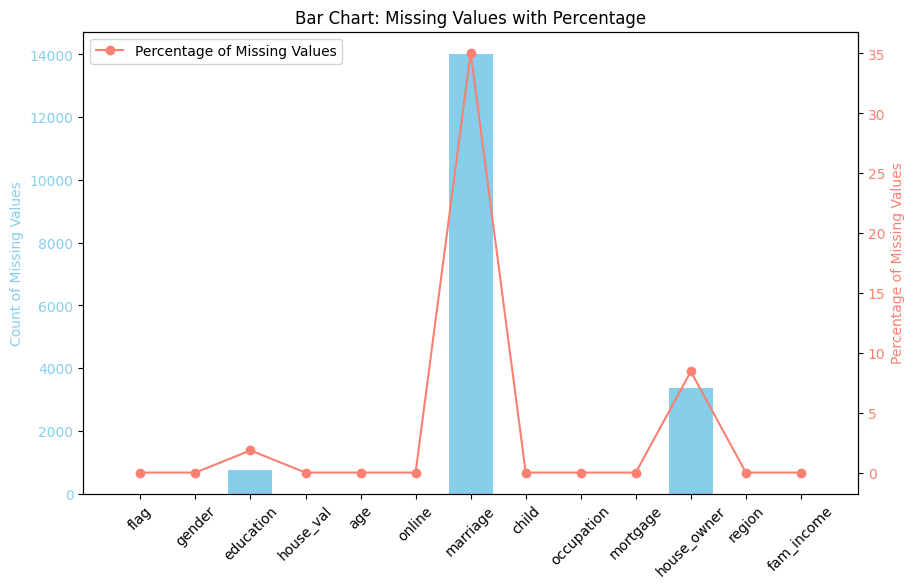


Missing Information:
flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64

Missing Information(%):
flag            0.0000
gender          0.0000
education       1.8525
house_val       0.0000
age             0.0000
online          0.0000
marriage       35.0675
child           0.0000
occupation      0.0000
mortgage        0.0000
house_owner     8.4425
region          0.0000
fam_income      0.0000
dtype: float64


In [124]:
# Plot for showing columns with missing values

# Missing information
missing_info = sales_data.isnull().sum()

# Calculate missing percentage
missing_percentage = 100 * sales_data.isnull().sum() / len(sales_data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Actual count of missing values (left y-axis)
color = 'skyblue'
ax1.bar(sales_data.columns, sales_data.isnull().sum(), color=color, label='Count of Missing Values')
ax1.set_ylabel('Count of Missing Values', color=color)
ax1.tick_params(axis='y', labelcolor=color)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Percentage of missing values (right y-axis)
ax2 = ax1.twinx()
color = 'salmon'
ax2.plot(sales_data.columns, missing_percentage, color=color, marker='o', label='Percentage of Missing Values')
ax2.set_ylabel('Percentage of Missing Values', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and labels
plt.title('Bar Chart: Missing Values with Percentage')
plt.xlabel('Variables')
plt.legend(loc='upper left')

plt.show()

print("\n\033[1mMissing Information:\033[0m")
print(missing_info)

print("\n\033[1mMissing Information(%):\033[0m")
print(missing_percentage)


In [142]:
# Creating a copy of Sales data for further steps
sales_data_v2 = sales_data.copy()

In [143]:
# Mapping dictionary for replacements in education
education_mapping = {
    '4. Grad': 'Graduation',
    '3. Bach': 'Bachelors',
    '2. Some College': 'College',
    '1. HS': 'High School',
    '0. <HS': 'Below High School'
}

# Replace values in 'education' column based on mapping dictionary
sales_data_v2['education'] = sales_data_v2['education'].map(education_mapping)

# Impute remaining missing values with 'Unknown'
sales_data_v2['education'].fillna('Unknown', inplace=True)

# Display the updated DataFrame
print(sales_data_v2['education'].unique())


['Graduation' 'Bachelors' 'College' 'High School' 'Below High School'
 'Unknown']


In [144]:
# Converting age to Ordinal value by extracting number from the values
sales_data_v2['age'] = (sales_data_v2['age'].str.split('_').str[0]).astype('Int64')
sales_data_v2['age'].unique()


<IntegerArray>
[1, 7, 2, 6, 5, 4, 3]
Length: 7, dtype: Int64

In [145]:
# Converting mortgage to Ordinal values
for mortgage in sales_data_v2['mortgage'].unique():
    level = re.findall(r'\d+', mortgage)[0]
    sales_data_v2['mortgage'].replace(mortgage, level, inplace=True)
# Print updated mortgage ranking
sales_data_v2['mortgage'] = sales_data_v2['mortgage'].astype('Int64')
sales_data_v2['mortgage'].unique()

<IntegerArray>
[1, 2, 3]
Length: 3, dtype: Int64

In [146]:
# Define a dictionary mapping alphabetical rankings to numerical rankings for fam_income
ranking = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'U': 0}

# Map alphabetical rankings to numerical rankings
sales_data_v2['fam_income'] = sales_data_v2['fam_income'].map(ranking)

In [147]:
# Replace '0' with 'N' in the 'child' column
sales_data_v2['child'] = sales_data_v2['child'].replace({'0': 'N'})

In [148]:
# Impute missing values in 'married' column based on 'child' column
sales_data_v2['marriage'] = sales_data_v2.apply(lambda row: 'Married/Single Parent' if pd.isnull(row['marriage']) and row['child'] == 'Y' else row['marriage'], axis=1)

# Impute remaining missing values with 'Unknown'
sales_data_v2['marriage'].fillna('Unknown', inplace=True)

# Display the updated DataFrame
print(sales_data_v2['marriage'].unique())

['Unknown' 'Married/Single Parent' 'Single' 'Married']


In [149]:
# Impute remaining missing values in house_owner with 'Unknown'
sales_data_v2['house_owner'].fillna('Unknown', inplace=True)

# Display the updated DataFrame
print(sales_data_v2['house_owner'].unique())

['Unknown' 'Owner' 'Renter']


#**Visualizations**

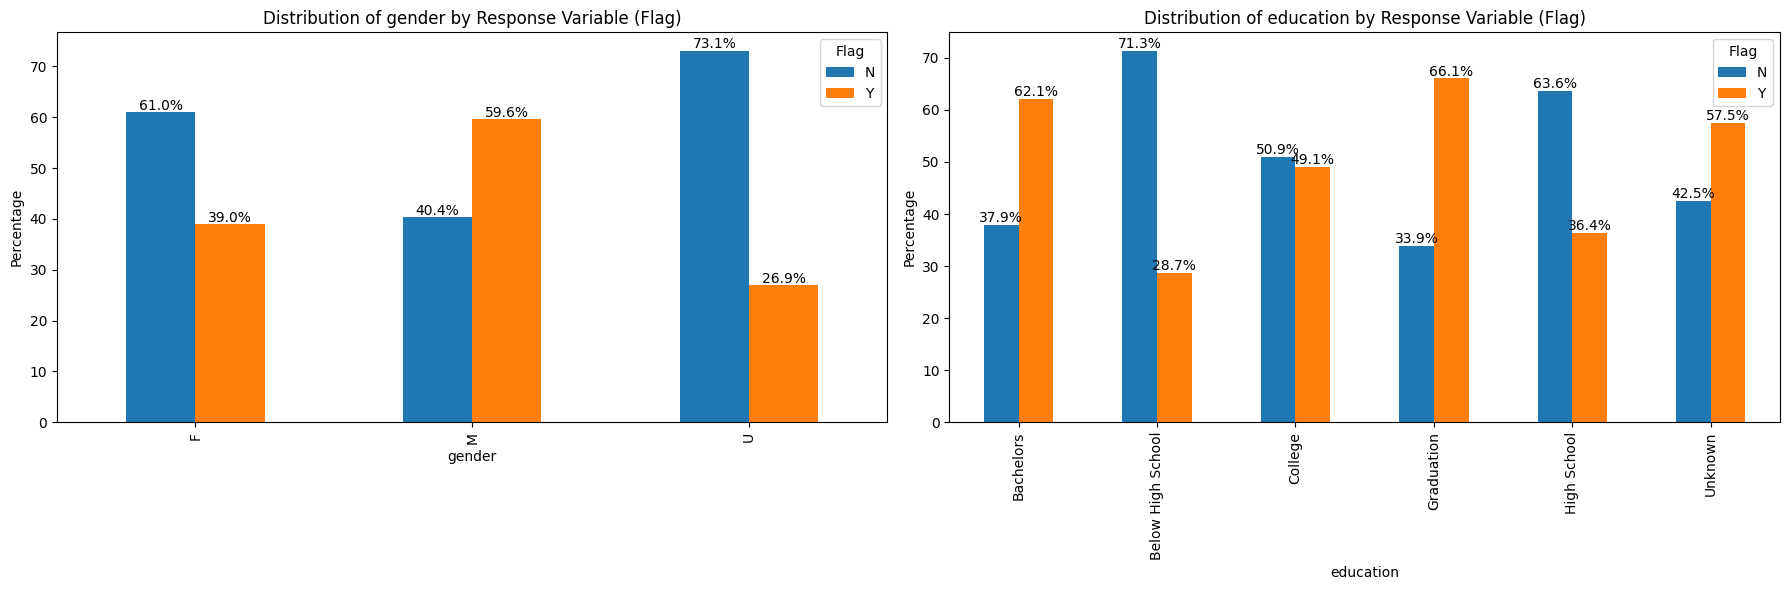

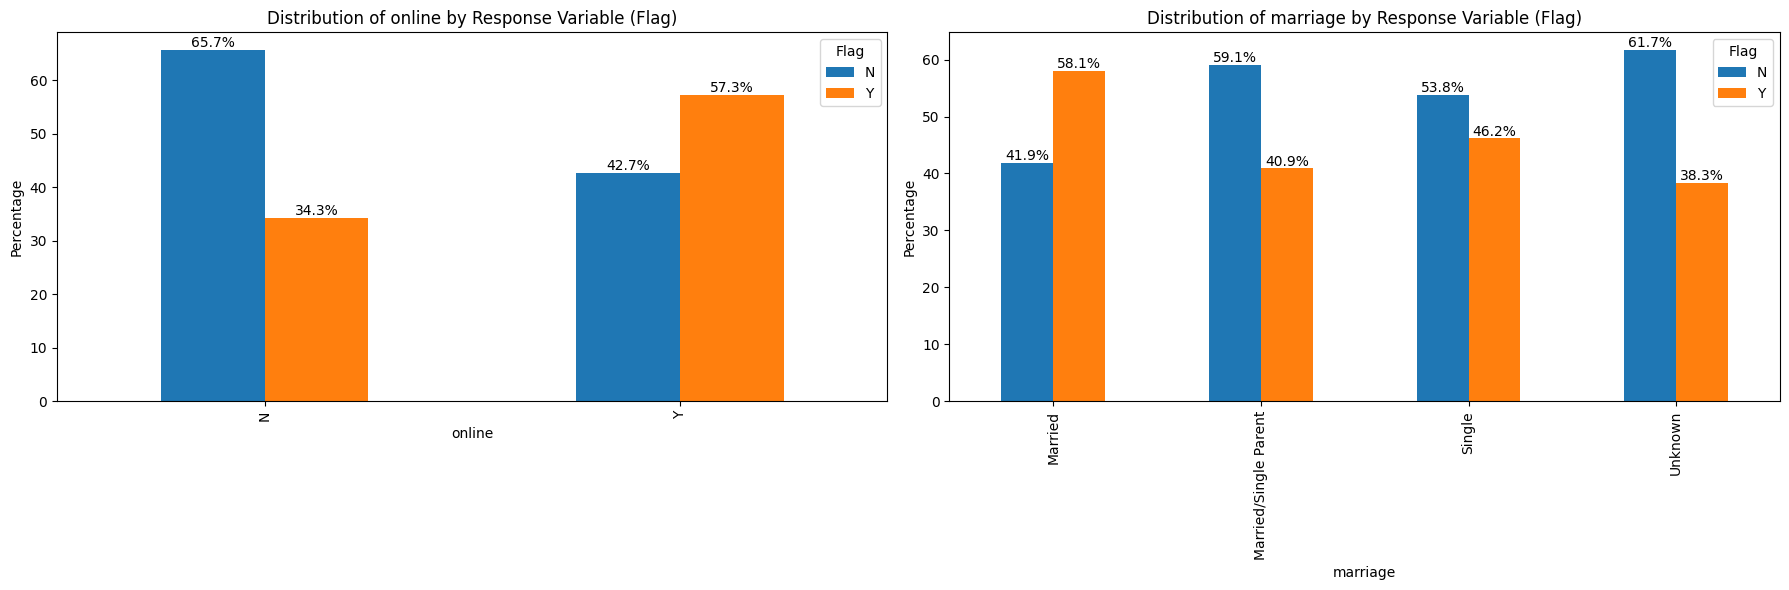

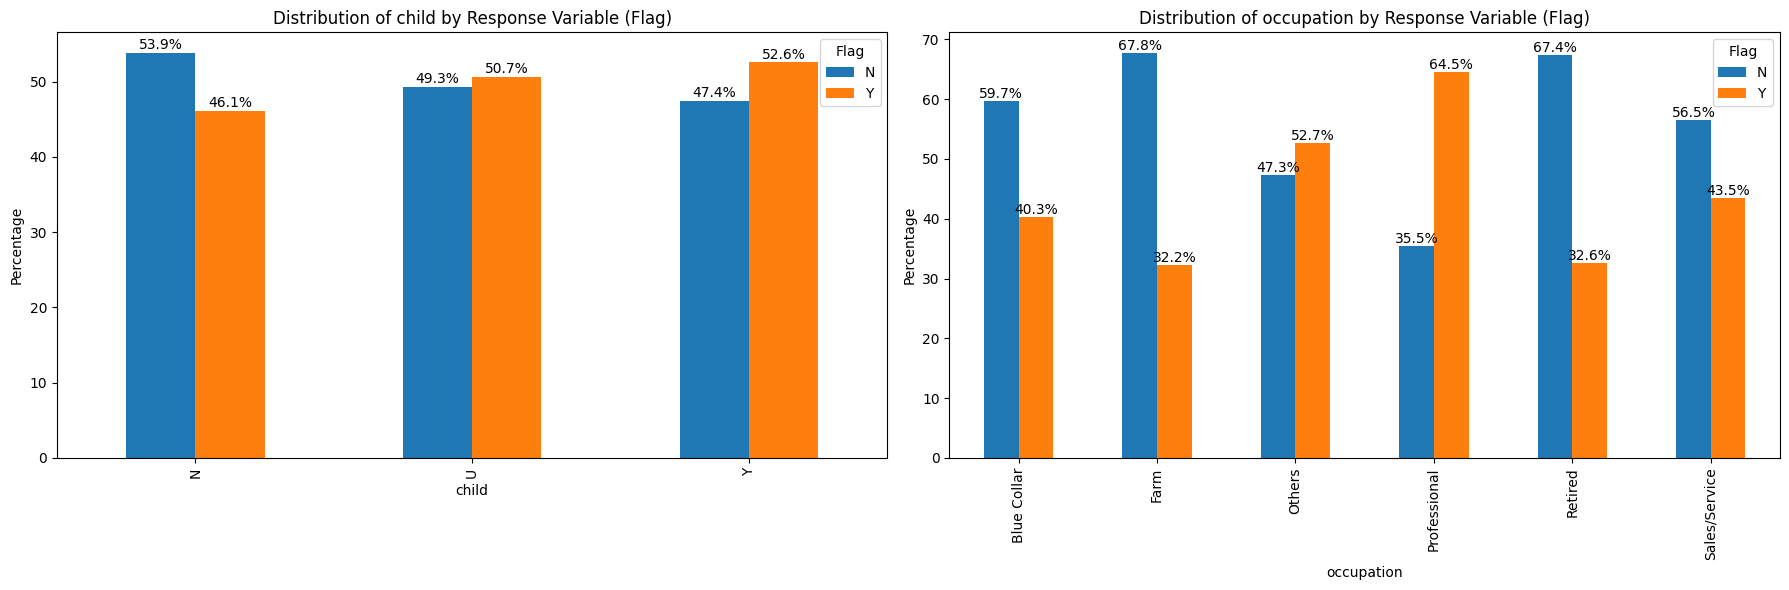

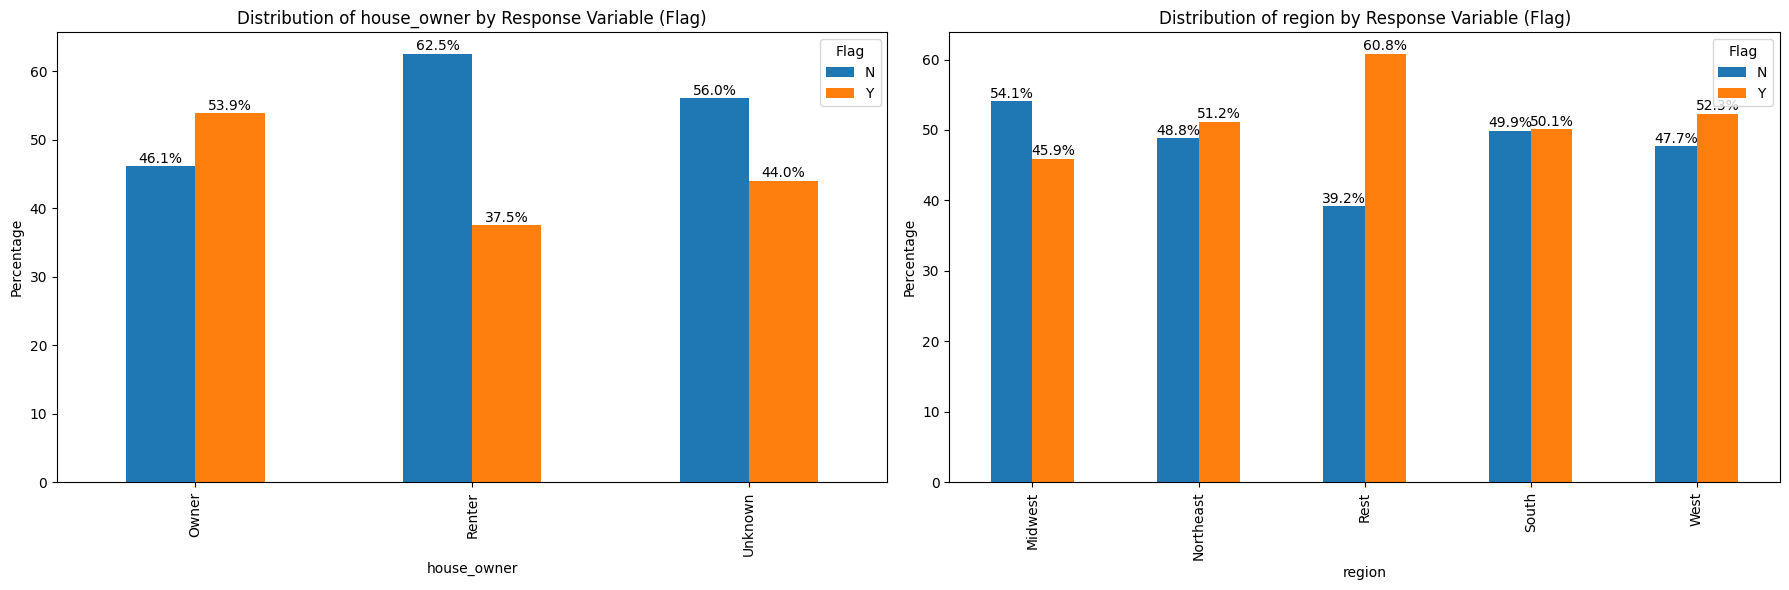

In [121]:
# Categorical variables Vs response variable (flag)

# Function to add percentage annotations on top of each bar
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                '{:.1f}%'.format(height),
                ha='center')

# Countplot of Categorical Predictors by Response Variable (as percentages)
categorical_predictors = ['gender', 'education', 'online', 'marriage', 'child', 'occupation', 'house_owner', 'region']
for i in range(0, len(categorical_predictors), 2):  # Iterate over predictors in steps of 2
    plt.figure(figsize=(18, 6))

    # Plot the first count plot
    plt.subplot(1, 2, 1)
    counts = sales_data_v2.groupby([categorical_predictors[i], 'flag']).size().unstack()
    (counts.div(counts.sum(axis=1), axis=0) * 100).plot(kind='bar', ax=plt.gca())
    plt.title(f'Distribution of {categorical_predictors[i]} by Response Variable (Flag)')
    plt.xlabel(categorical_predictors[i])
    plt.ylabel('Percentage')
    plt.legend(title='Flag')
    add_percentage_labels(plt.gca())

    # Plot the second count plot if available
    if i + 1 < len(categorical_predictors):
        plt.subplot(1, 2, 2)
        counts = sales_data_v2.groupby([categorical_predictors[i + 1], 'flag']).size().unstack()
        (counts.div(counts.sum(axis=1), axis=0) * 100).plot(kind='bar', ax=plt.gca())
        plt.title(f'Distribution of {categorical_predictors[i + 1]} by Response Variable (Flag)')
        plt.xlabel(categorical_predictors[i + 1])
        plt.ylabel('Percentage')
        plt.legend(title='Flag')
        add_percentage_labels(plt.gca())

    plt.tight_layout()
    plt.show()


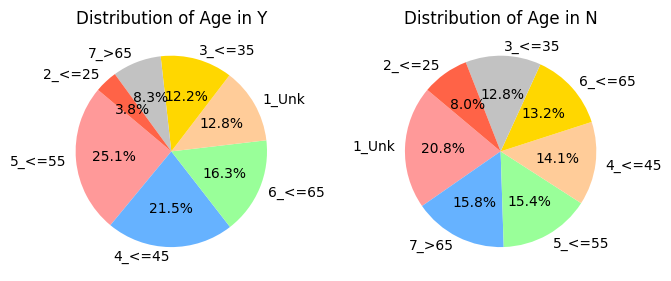

In [122]:
# Response variable (flag) by Age

# Enumerate the unique categories in 'flag'
flag_categories = sales_data['flag'].unique()

# Group data by 'flag' and calculate age category counts within each group
age_counts_by_flag = sales_data.groupby('flag')['age'].value_counts()

# Define light colors for the pie chart slices
light_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2C2', '#FF6347']

# Create a pie chart for each 'flag' category
plt.figure(figsize=(10, 8))
for i, flag in enumerate(flag_categories):
    plt.subplot(3, 3, i+1)
    age_counts = age_counts_by_flag.loc[flag]
    plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
    plt.title(f'Distribution of Age in {flag}')
plt.tight_layout()
plt.show()




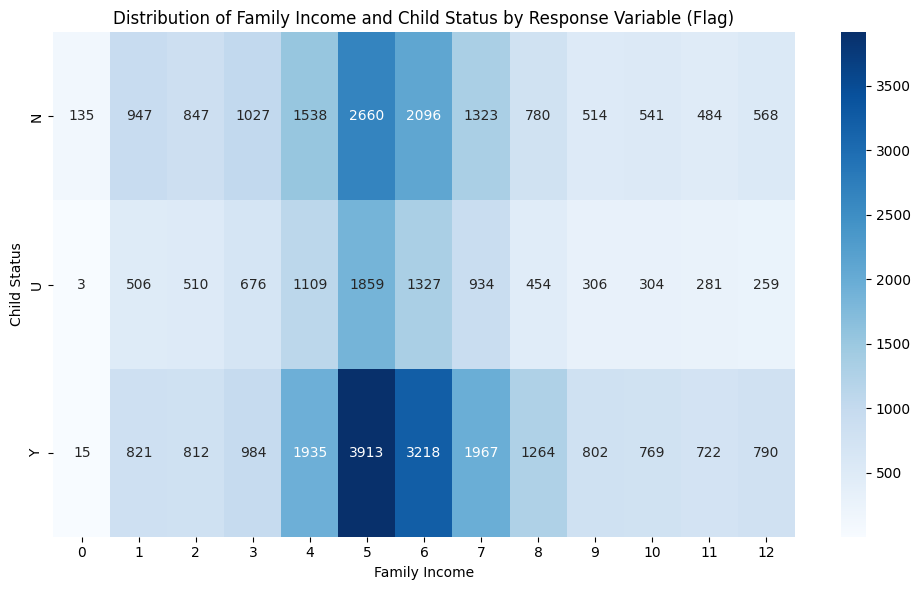

In [123]:
# Response variable (flag) by family income and child

# Create a pivot table to aggregate counts of flag based on fam_income and child
pivot_table = sales_data_v2.pivot_table(index='child', columns='fam_income',
                                       values='flag', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Distribution of Family Income and Child Status by Response Variable (Flag)')
plt.xlabel('Family Income')
plt.ylabel('Child Status')
plt.tight_layout()
plt.show()


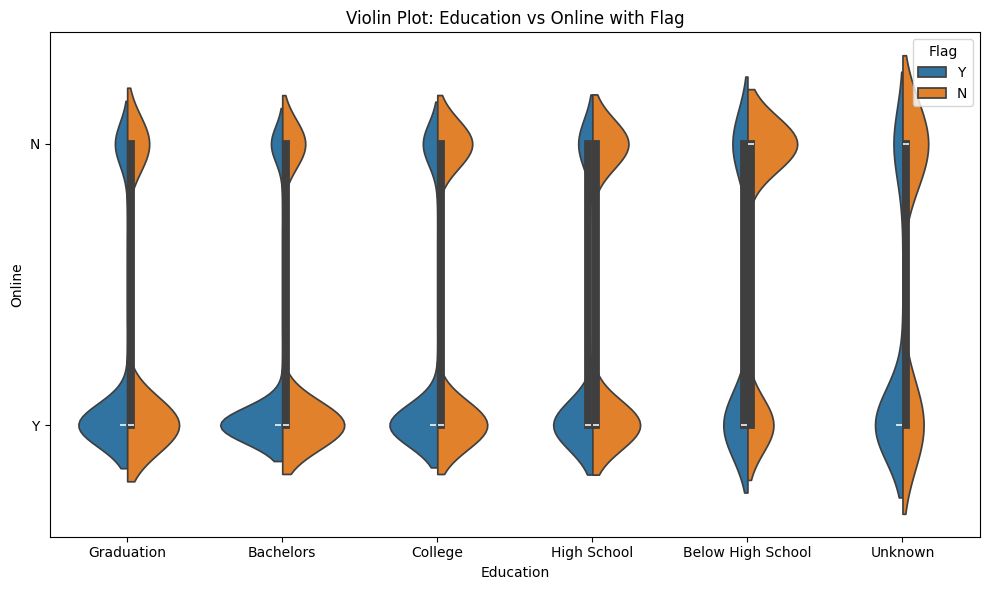

In [125]:
# Plot for Education vs Online with Flag
# Create a violin plot for education vs online with flag as hue
plt.figure(figsize=(10, 6))
sns.violinplot(x='education', y='online', hue='flag', data=sales_data_v2, split=True)
plt.title('Violin Plot: Education vs Online with Flag')
plt.xlabel('Education')
plt.ylabel('Online')
plt.tight_layout()
plt.legend(title='Flag', loc='upper right')  # Add legend with title and specify location
plt.show()

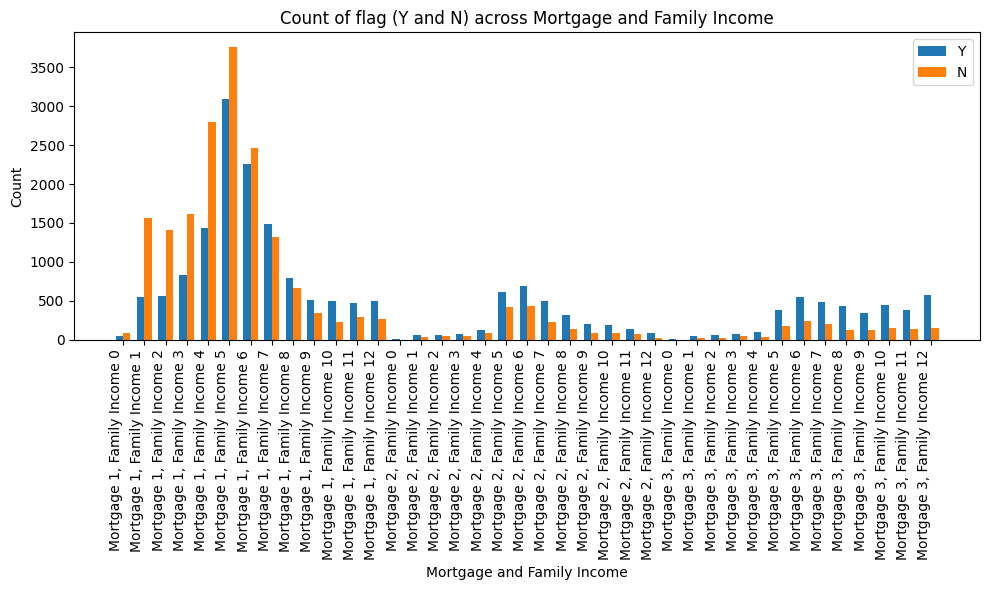

In [ ]:
# Group by mortgage and fam_income, calculate count of 'Y' and 'N'
grouped_data = sales_data_v2.groupby(['mortgage', 'fam_income', 'flag']).size().unstack(fill_value=0)

# Define index for x-axis labels
x_labels = [f'Mortgage {m}, Family Income {f}' for m, f in grouped_data.index]

# Plotting Count of flag (Y and N) across Mortgage and Family Income
x = np.arange(len(grouped_data.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, grouped_data['Y'], width, label='Y')  # Access 'Y' column for count of 'Y' values
bars2 = ax.bar(x + width/2, grouped_data['N'], width, label='N')  # Access 'N' column for count of 'N' values

ax.set_xlabel('Mortgage and Family Income')
ax.set_ylabel('Count')
ax.set_title('Count of flag (Y and N) across Mortgage and Family Income')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=90, ha='right')  # Rotate labels for better readability
ax.legend()

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# **Random Forest Classifier Model**

In [150]:
# Map 'Y' to 1 and 'N' to 0
sales_data_v2['flag'] = sales_data_v2['flag'].map({'Y': 1, 'N': 0})

# Assuming 'data' is your DataFrame containing categorical variables
design_matrix = pd.get_dummies(sales_data_v2)

design_matrix.columns

Index(['flag', 'house_val', 'age', 'mortgage', 'fam_income', 'gender_F',
       'gender_M', 'gender_U', 'education_Bachelors',
       'education_Below High School', 'education_College',
       'education_Graduation', 'education_High School', 'education_Unknown',
       'online_N', 'online_Y', 'marriage_Married',
       'marriage_Married/Single Parent', 'marriage_Single', 'marriage_Unknown',
       'child_N', 'child_U', 'child_Y', 'occupation_Blue Collar',
       'occupation_Farm', 'occupation_Others', 'occupation_Professional',
       'occupation_Retired', 'occupation_Sales/Service', 'house_owner_Owner',
       'house_owner_Renter', 'house_owner_Unknown', 'region_Midwest',
       'region_Northeast', 'region_Rest', 'region_South', 'region_West'],
      dtype='object')

**Assignment: Features and Target variable**




In [151]:
# Features and target variable
X = design_matrix.drop('flag', axis=1)
y = design_matrix['flag']

**Split the data into Train and Test sets**

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define the Random Forest Classifier and its default Hyperparameter values**

In [153]:
clf = RandomForestClassifier(random_state=42, oob_score=True)

print("Default hyperparameter values:")
print(clf.get_params())

Default hyperparameter values:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Fit the Model and Display the Performance Metrics**

In [154]:
y_pred_before_tuning = clf.fit(X_train, y_train).predict(X_test)
report_before_tuning = classification_report(y_test, y_pred_before_tuning)
print("\033[1mPerformance Metrics Before Hyperparameter Tuning:\033[0m")
print(report_before_tuning)

# Calculate the out-of-bag score
oob_score = clf.oob_score_
print(f'OOB Score: {oob_score}')


Performance Metrics Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4024
           1       0.66      0.65      0.66      3976

    accuracy                           0.66      8000
   macro avg       0.66      0.66      0.66      8000
weighted avg       0.66      0.66      0.66      8000

OOB Score: 0.6606875


**Obtain the feature importances and plot them**

house_val                         0.247713
age                               0.100884
mortgage                          0.033451
fam_income                        0.133067
gender_F                          0.016533
gender_M                          0.025244
gender_U                          0.004110
education_Bachelors               0.018369
education_Below High School       0.012372
education_College                 0.018706
education_Graduation              0.015116
education_High School             0.017637
education_Unknown                 0.006050
online_N                          0.015698
online_Y                          0.021843
marriage_Married                  0.019776
marriage_Married/Single Parent    0.010160
marriage_Single                   0.011919
marriage_Unknown                  0.012774
child_N                           0.017312
child_U                           0.017162
child_Y                           0.016041
occupation_Blue Collar            0.013363
occupation_

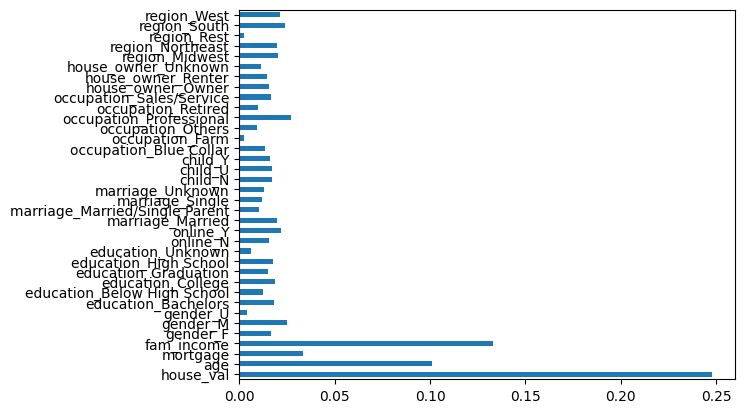

In [155]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

# **Model Performance Evaluation Plots**

**Predicted Probabilities**

In [156]:
y_score = clf.predict_proba(X_test)[:, 1]
y_score

array([0.73 , 0.34 , 0.41 , ..., 0.885, 0.19 , 0.23 ])

**ROC-Curve and ROC-Area**

In [157]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

roc_auc

0.7213345305430996

**Precision-Recall Curve and Average Precision**

In [158]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
average_precision

0.7050194993270861

**Compute Lift Curve**

In [159]:
# lift_values = []
# thresholds = np.linspace(0, 1, 100)
# for threshold in thresholds:
#     y_pred = (y_score >= threshold).astype(int)
#     lift_values.append(np.mean(y_pred) / np.mean(y_test))

**Compute F1-Score Curve**

In [162]:
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

**Confusion Matrix**

In [163]:
y_pred_binary = (y_score >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


#**Random Forest Classifier performance metrics plots**

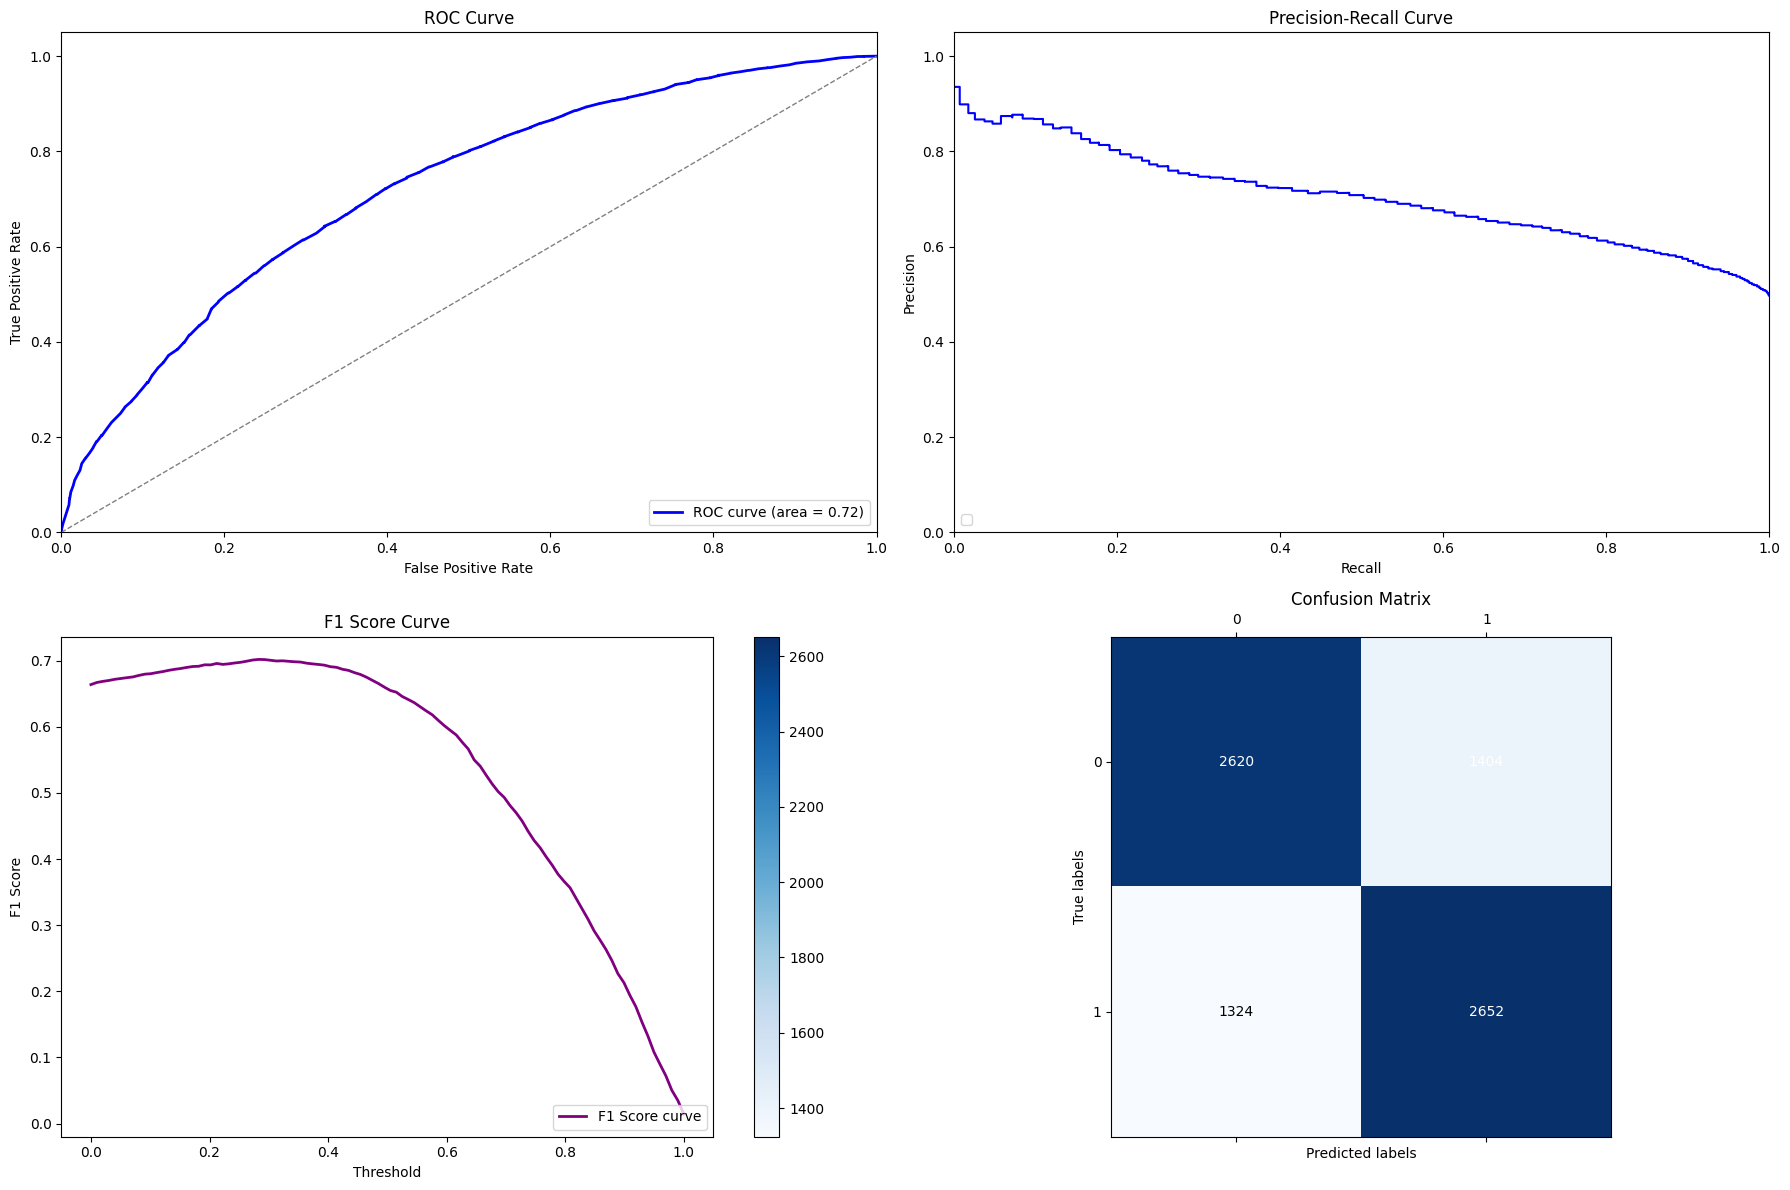

In [164]:
# Create a panel of plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the ROC Curve
axes[0, 0].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0, 0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend(loc="lower right")

# Plot the Precision-Recall Curve
axes[0, 1].step(recall, precision, color='blue', where='post')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].legend(loc="lower left")

# Plot the F1 Score Curve
axes[1, 0].plot(thresholds, f1_scores, color='purple', lw=2, label='F1 Score curve')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score Curve')
axes[1, 0].legend(loc="lower right")

# Plot the Confusion Matrix
conf_matrix_img = axes[1, 1].matshow(conf_matrix, cmap=plt.cm.Blues)
axes[1, 1].set_title('Confusion Matrix')
plt.colorbar(conf_matrix_img, ax=axes[1, 0])
axes[1, 1].set_xlabel('Predicted labels')
axes[1, 1].set_ylabel('True labels')

# Add Text Annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes[1, 1].text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2. else "black")


plt.tight_layout() # Adjust the layout
plt.show() # Show the plot panel

**Define the pipeline with scaling and classifier**

In [165]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', clf)
])

**Define two hyperparameters for tuning**

In [167]:
param_grid = {
    'clf__n_estimators': [1000, 2000],
    'clf__max_depth': [None, 10, 20]
    # 'clf__min_samples_split': [2, 5],
    # 'clf__min_samples_leaf': [1, 2]
}

**Grid search with Cross-Validation**

In [168]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('clf',
                                        RandomForestClassifier(oob_score=True,
                                                               random_state=42))]),
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__n_estimators': [1000, 2000]},
             scoring='accuracy')

**Display the Hyperparameter Values (Best Grid Search Estimators)**

In [169]:
best_clf = grid_search.best_estimator_
print(best_clf)

Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=1000,
                                        oob_score=True, random_state=42))])


**Performance metrics after hyperparameter tuning**

In [170]:
y_pred_after_tuning = best_clf.predict(X_test)
report_after_tuning = classification_report(y_test, y_pred_after_tuning)
print("\033[1m\nPerformance Metrics After Hyperparameter Tuning:\033[0m")
print(report_after_tuning)


Performance Metrics After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4024
           1       0.69      0.69      0.69      3976

    accuracy                           0.69      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.69      0.69      0.69      8000



In [39]:
# importances = pd.Series(best_clf.feature_importances_, index=X.columns)
# print(importances)
# importances.plot(kind='barh')
# plt.show()

**Based on the Hyperparameter Values (Best Grid Search Estimators), recompute and display the Performance Evaluation Plots**

In [40]:
# Get the predicted probabilities
y_score = best_clf.predict_proba(X_test)[:, 1]

# Compute the ROC Curve and ROC Area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Compute the Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# Compute the Lift Curve
lift_values = []
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    lift_values.append(np.mean(y_pred) / np.mean(y_test))

# Compute the F1 Score Curve
f1_scores = []
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Compute the Confusion Matrix
y_pred_binary = (y_score >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)



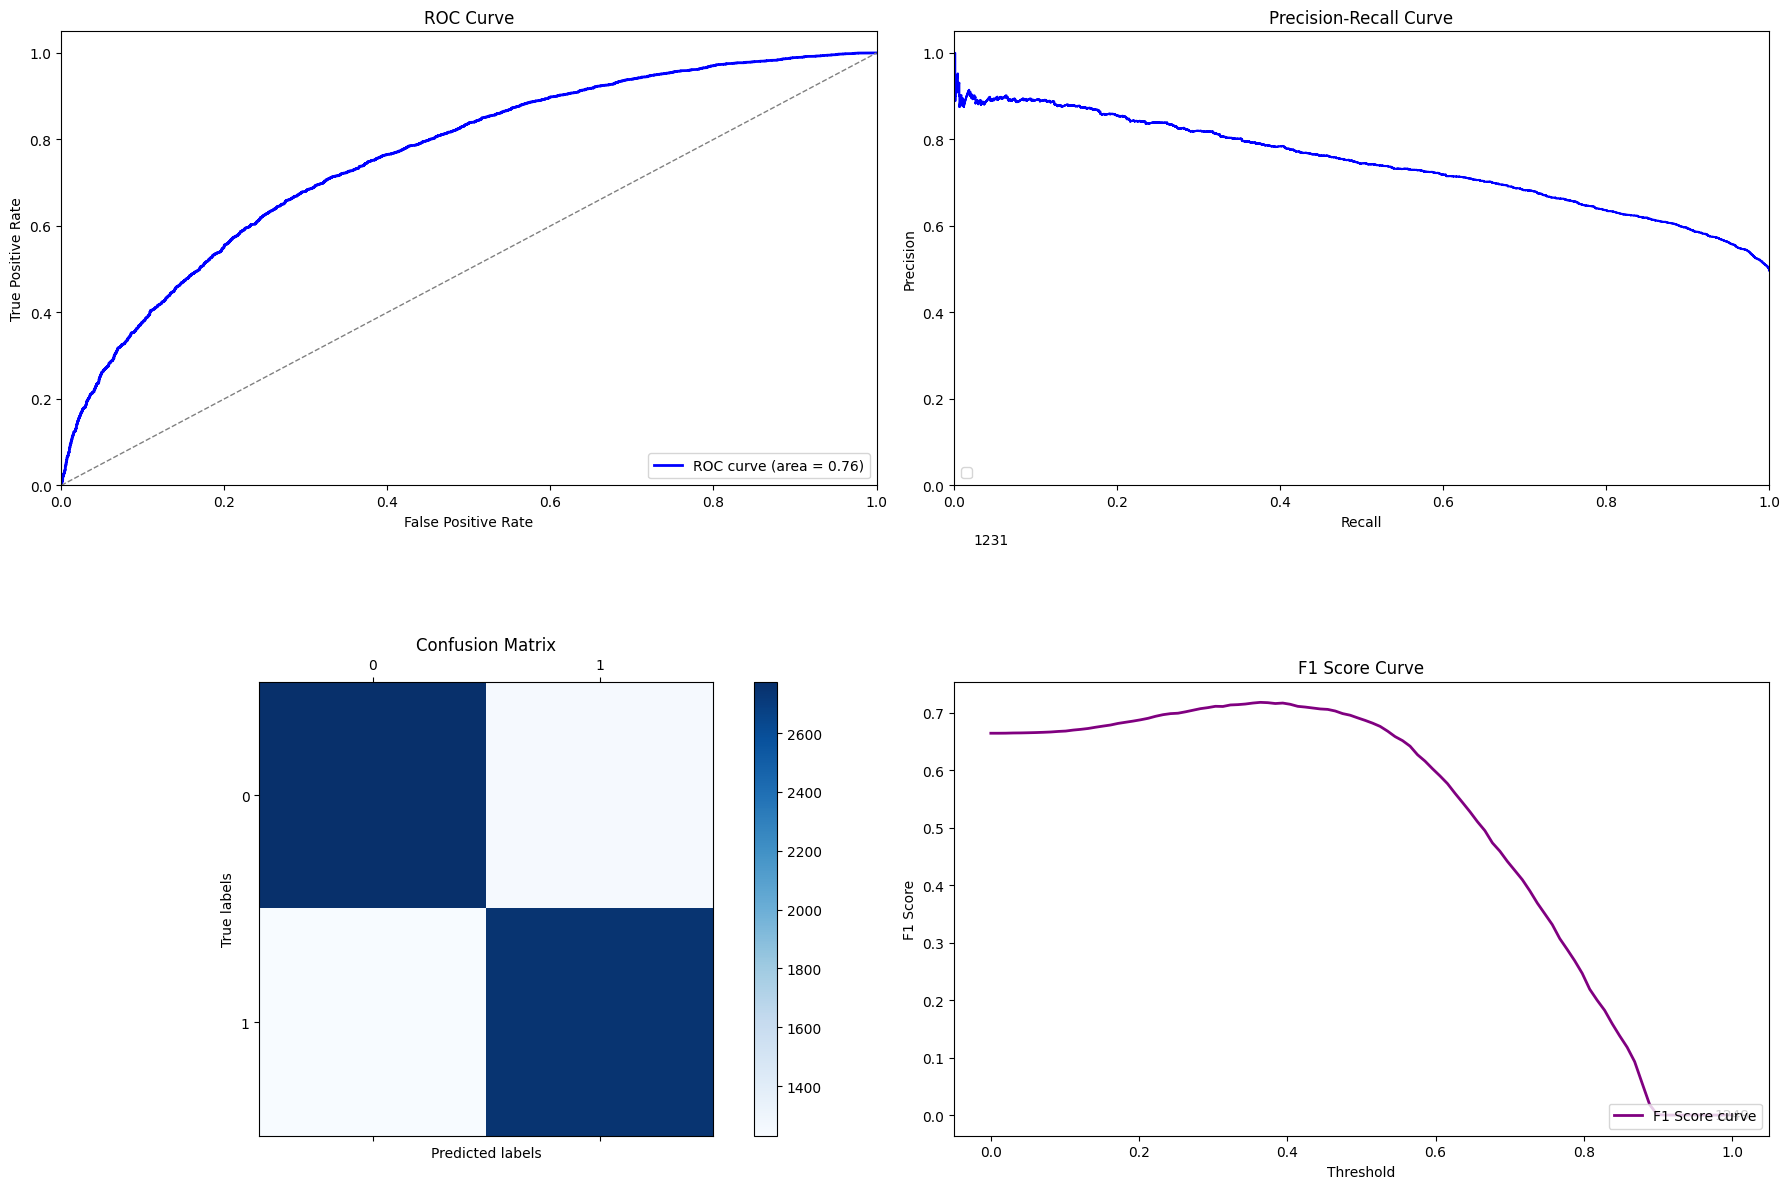

In [ ]:
# Create a panel of plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the ROC Curve
axes[0, 0].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0, 0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend(loc="lower right")

# Plot the Precision-Recall Curve
axes[0, 1].step(recall, precision, color='blue', where='post')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].legend(loc="lower left")

# Plot the Confusion Matrix
conf_matrix_img = axes[1, 0].matshow(conf_matrix, cmap=plt.cm.Blues)
axes[1, 0].set_title('Confusion Matrix')
plt.colorbar(conf_matrix_img, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted labels')
axes[1, 0].set_ylabel('True labels')

# Add Text Annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes[1, 1].text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2. else "black")

# Plot the F1 Score Curve
axes[1, 1].plot(thresholds, f1_scores, color='purple', lw=2, label='F1 Score curve')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score Curve')
axes[1, 1].legend(loc="lower right")



plt.tight_layout()
plt.show()

#**Support Vector Machine (SVM) Model Classifier**

**Importing library packages for SVM**

In [171]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

**Assignment: Features and Target variable**

In [172]:
design_matrix = pd.get_dummies(sales_data_v2)
design_matrix.columns

# Features and target variable
X = design_matrix.drop('flag', axis=1)
y = design_matrix['flag']

**Split the data into training and testing sets, 80:20**

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Robust scaling**

In [174]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Create an SVM classifier**

In [175]:
# Create an SVM classifier
svm_classifier = svm.SVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.485375


**Performance metrics after for SVM**

In [176]:
print("\033[1mConfusion Matrix\033[0m\n", confusion_matrix(y_test, y_pred))
print("\033[1m\nPerformance Metrics:\033[0m", classification_report(y_test, y_pred))

[[3645  379]
 [3738  238]]
              precision    recall  f1-score   support

           0       0.49      0.91      0.64      4024
           1       0.39      0.06      0.10      3976

    accuracy                           0.49      8000
   macro avg       0.44      0.48      0.37      8000
weighted avg       0.44      0.49      0.37      8000



**Create SVM classifier and Define the hyperparameter grid to search**

In [181]:
# Create an SVM classifier
classifier = svm.SVC()
hyperparameters = {
                   'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

**Search the hyperparameter grid using GridSearchCV()**

In [182]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5) #scoring='roc_auc'
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

**Use the best model provided by the grid search to make predictions on the test data**

In [183]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=0.01, gamma=0.01, kernel='linear', random_state=42) 



**Performance metrics after hyperparameter tuning**

In [185]:
print("\033[1m\nConfusion Matrix:\033[0m\n", confusion_matrix(y_test, y_pred))
print("\033[1m\nPerformance Metrics After Hyperparameter Tuning:\033[0m", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2730 1294]
 [1289 2687]]

Performance Metrics After Hyperparameter Tuning:               precision    recall  f1-score   support

           0       0.68      0.68      0.68      4024
           1       0.67      0.68      0.68      3976

    accuracy                           0.68      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.68      0.68      0.68      8000



**Display the confusion matrix (heatmap)**

<Axes: >

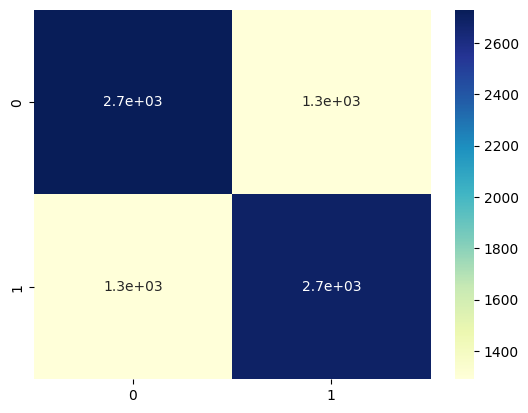

In [186]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

**A. Display the feature importance plot**

house_val                         0.057260
age                               0.283839
mortgage                          0.273770
fam_income                        0.161758
gender_F                         -0.230976
gender_M                          0.501754
gender_U                         -0.270778
education_Bachelors               0.165437
education_Below High School      -0.441156
education_College                -0.070950
education_Graduation              0.262678
education_High School            -0.378390
education_Unknown                 0.462381
online_N                         -0.346475
online_Y                          0.346475
marriage_Married                  0.197087
marriage_Married/Single Parent   -0.251961
marriage_Single                   0.257767
marriage_Unknown                 -0.202892
child_N                          -0.175003
child_U                           0.090721
child_Y                           0.084282
occupation_Blue Collar           -0.114518
occupation_

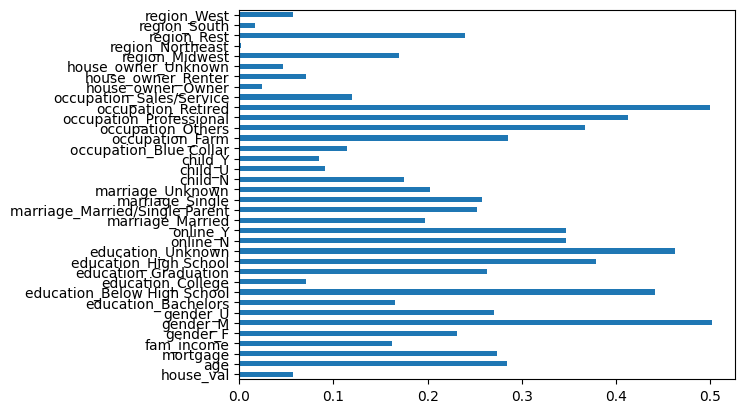

In [187]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()

**B. Display the feature importance plot**

[[ 0.05725975  0.28383883  0.27376972  0.16175769 -0.23097599  0.50175354
  -0.27077755  0.16543719 -0.441156   -0.07095011  0.26267809 -0.37838997
   0.4623808  -0.34647496  0.34647496  0.19708666 -0.2519613   0.25776663
  -0.20289199 -0.17500278  0.0907208   0.08428198 -0.11451794 -0.28554798
   0.36751438  0.41240747 -0.4997696   0.11991367  0.02419827 -0.07062118
   0.04642291 -0.16917536  0.00215785  0.24       -0.01634868 -0.05663381]] 

[[0.05725975 0.28383883 0.27376972 0.16175769 0.23097599 0.50175354
  0.27077755 0.16543719 0.441156   0.07095011 0.26267809 0.37838997
  0.4623808  0.34647496 0.34647496 0.19708666 0.2519613  0.25776663
  0.20289199 0.17500278 0.0907208  0.08428198 0.11451794 0.28554798
  0.36751438 0.41240747 0.4997696  0.11991367 0.02419827 0.07062118
  0.04642291 0.16917536 0.00215785 0.24       0.01634868 0.05663381]] 



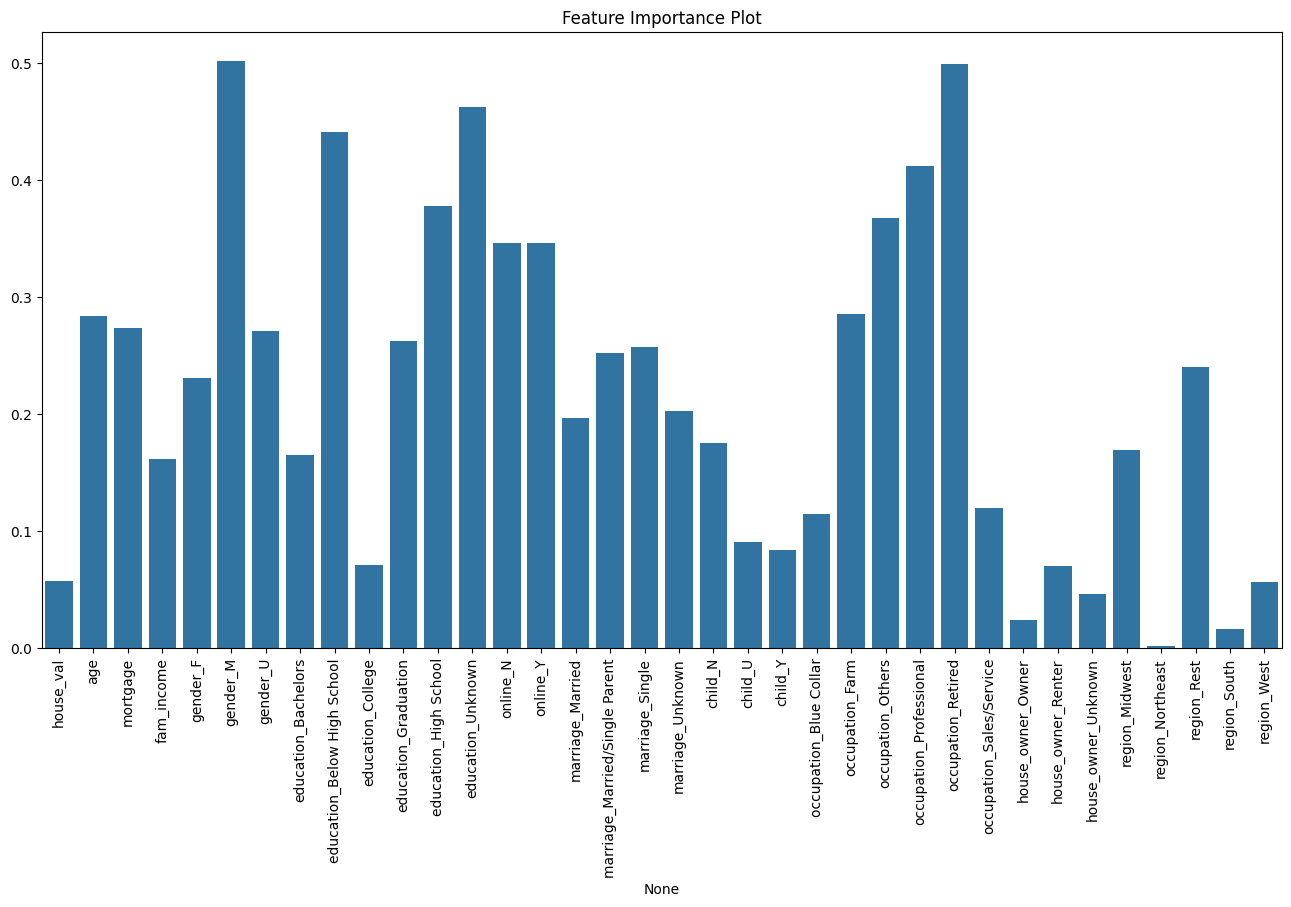

In [188]:
# Print the coefficients of the hyperplane
coefficients = best_classifier.coef_
print(coefficients,'\n')
coefficients = abs(coefficients)
print(coefficients,'\n')
# Display the coefficients
#import matplotlib.pyplot as plt
#%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=X_train.columns, y=coefficients.reshape(-1))
ax.set_title("Feature Importance Plot")
# Rotate the y-axis labels by 45 degrees
plt.xticks(rotation=90)
plt.show()